<h1 style='color:purple' align='center'> Customer Reviews Analysis</h1>

In [1]:
import spacy
import re
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
df=pd.read_csv("BA_reviews.csv")
df

,Unnamed: 0,reviews
0,0,Not Verified | We had a Premium Economy retur...
1,1,✅ Trip Verified | I should like to review my ...
2,2,✅ Trip Verified | We have flown with British A...
3,3,✅ Trip Verified | I sat in the plane at Vienna...
4,4,✅ Trip Verified | It is almost 11pm we were su...
...,...,...
995,995,✅ Trip Verified | Gatwick to Dubrovnik. Overc...
996,996,✅ Trip Verified | I paid an extra £500 for tw...
997,997,✅ Trip Verified | Faro to Heathrow. Flight wa...
998,998,✅ Trip Verified | Vancouver to London. An exce...


In [3]:
df.isna().sum()

Unnamed: 0    0
reviews       0
dtype: int64

In [4]:
df.reviews[0]

'Not Verified |  We had a Premium Economy return flight Los Angeles to London. The outbound flight was cancelled with under 12 hours notice, and we had to instead take an economy flight via Dublin to London. That\'s annoying but it happens. What is really difficult to understand is BA\'s response since I raised this as a claim once our return flight had completed (as I was instructed to do). It is now nearly 5 months and there has been no response other than one in early March with the title "we\'ve not forgotten your case" and "We\'re really sorry you\'re still waiting for a response from us. We know it\'s been a long time since you contacted us and this isn\'t the service you should expect. Rest assured we\'ve not forgotten your case. Our Customer Relations team are working extremely hard to respond to you as soon as possible. Thank you for your continued patience. You can check the status of your case here. Please accept our most sincere apologies. We look forward to speaking with y

<h2 style='color:blue'>removing special charactors, extra spaces</h2>

In [5]:
def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(r' +', ' ', text)
    return text.strip().lower() 

In [6]:
df["cleaned_data"]=df.reviews.map(preprocess)
df

,Unnamed: 0,reviews,cleaned_data
0,0,Not Verified | We had a Premium Economy retur...,not verified we had a premium economy return f...
1,1,✅ Trip Verified | I should like to review my ...,trip verified i should like to review my fligh...
2,2,✅ Trip Verified | We have flown with British A...,trip verified we have flown with british airwa...
3,3,✅ Trip Verified | I sat in the plane at Vienna...,trip verified i sat in the plane at vienna air...
4,4,✅ Trip Verified | It is almost 11pm we were su...,trip verified it is almost 11pm we were suppos...
...,...,...,...
995,995,✅ Trip Verified | Gatwick to Dubrovnik. Overc...,trip verified gatwick to dubrovnik overcrowded...
996,996,✅ Trip Verified | I paid an extra £500 for tw...,trip verified i paid an extra 500 for two prem...
997,997,✅ Trip Verified | Faro to Heathrow. Flight wa...,trip verified faro to heathrow flight was very...
998,998,✅ Trip Verified | Vancouver to London. An exce...,trip verified vancouver to london an excellent...


<h2 style='color:blue'>lemmatization</h2>

In [7]:
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
def lemma(text):
    tokens = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_words)

In [8]:
df.cleaned_data=df.cleaned_data.apply(lemma)

<h2 style='color:blue'>removing stoping words</h2>

In [47]:
nlp = spacy.load("en_core_web_sm")
new_stop_words = ["trip", "british", "airway", "airline", "lhr","flight","flew","ba","city","airport"]
for word in new_stop_words:
    nlp.vocab[word].is_stop = True
def no_stop_word(data):
    doc = nlp(data)
    no_stop_words = [token.text for token in doc if not token.is_stop]
    return " ".join(no_stop_words) 

In [48]:
df.cleaned_data=df.cleaned_data.apply(no_stop_word)

In [49]:
df

,Unnamed: 0,reviews,cleaned_data,polarity,sentiments
0,0,Not Verified | We had a Premium Economy retur...,economy return los angeles london outbound wa ...,-0.117341,negative
1,1,✅ Trip Verified | I should like to review my ...,like review hannover london heathrow firstly w...,0.235646,nutral
2,2,✅ Trip Verified | We have flown with British A...,flown time wa far worst experience able check ...,0.001111,nutral
3,3,✅ Trip Verified | I sat in the plane at Vienna...,sat plane vienna hour arriving london wa sent ...,-0.050000,negative
4,4,✅ Trip Verified | It is almost 11pm we were su...,11 pm supposed 19 20 sitting plane worst techn...,-0.291667,negative
...,...,...,...,...,...
995,995,✅ Trip Verified | Gatwick to Dubrovnik. Overc...,gatwick dubrovnik overcrowded lounge business ...,0.152041,nutral
996,996,✅ Trip Verified | I paid an extra £500 for tw...,paid extra 500 economy seat long haul wa disap...,-0.087500,negative
997,997,✅ Trip Verified | Faro to Heathrow. Flight wa...,faro heathrow wa good issue baggage collection...,0.333333,nutral
998,998,✅ Trip Verified | Vancouver to London. An exce...,vancouver london excellent travel route time y...,0.453788,nutral


<h2 style='color:blue'>polarity</h2>

In [61]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def polarity(data):
    return analyzer.polarity_scores(data)['compound']

In [62]:
df["polarity"]=df.cleaned_data.apply(polarity)

In [63]:
df

,Unnamed: 0,reviews,cleaned_data,polarity,sentiments
0,0,Not Verified | We had a Premium Economy retur...,economy return los angeles london outbound wa ...,-0.0462,negative
1,1,✅ Trip Verified | I should like to review my ...,like review hannover london heathrow firstly w...,0.9859,nutral
2,2,✅ Trip Verified | We have flown with British A...,flown time wa far worst experience able check ...,-0.5859,nutral
3,3,✅ Trip Verified | I sat in the plane at Vienna...,sat plane vienna hour arriving london wa sent ...,0.0000,negative
4,4,✅ Trip Verified | It is almost 11pm we were su...,11 pm supposed 19 20 sitting plane worst techn...,-0.0772,negative
...,...,...,...,...,...
995,995,✅ Trip Verified | Gatwick to Dubrovnik. Overc...,gatwick dubrovnik overcrowded lounge business ...,0.5106,nutral
996,996,✅ Trip Verified | I paid an extra £500 for tw...,paid extra 500 economy seat long haul wa disap...,-0.6908,negative
997,997,✅ Trip Verified | Faro to Heathrow. Flight wa...,faro heathrow wa good issue baggage collection...,-0.9501,nutral
998,998,✅ Trip Verified | Vancouver to London. An exce...,vancouver london excellent travel route time y...,0.9840,nutral


<h2 style='color:blue'>sentiments</h2>

In [64]:
def sentiments(label):
    if label<0:
        return "negative"
    elif label>=0.5:
        return "positive"
    else:
        return "nutral"

In [65]:
df["sentiments"]=df.polarity.apply(sentiments)

In [66]:
df

,Unnamed: 0,reviews,cleaned_data,polarity,sentiments
0,0,Not Verified | We had a Premium Economy retur...,economy return los angeles london outbound wa ...,-0.0462,negative
1,1,✅ Trip Verified | I should like to review my ...,like review hannover london heathrow firstly w...,0.9859,positive
2,2,✅ Trip Verified | We have flown with British A...,flown time wa far worst experience able check ...,-0.5859,negative
3,3,✅ Trip Verified | I sat in the plane at Vienna...,sat plane vienna hour arriving london wa sent ...,0.0000,nutral
4,4,✅ Trip Verified | It is almost 11pm we were su...,11 pm supposed 19 20 sitting plane worst techn...,-0.0772,negative
...,...,...,...,...,...
995,995,✅ Trip Verified | Gatwick to Dubrovnik. Overc...,gatwick dubrovnik overcrowded lounge business ...,0.5106,positive
996,996,✅ Trip Verified | I paid an extra £500 for tw...,paid extra 500 economy seat long haul wa disap...,-0.6908,negative
997,997,✅ Trip Verified | Faro to Heathrow. Flight wa...,faro heathrow wa good issue baggage collection...,-0.9501,negative
998,998,✅ Trip Verified | Vancouver to London. An exce...,vancouver london excellent travel route time y...,0.9840,positive


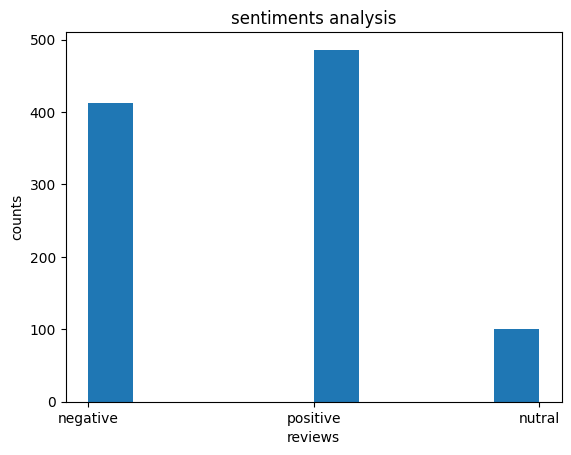

In [67]:
plt.hist(df.sentiments)
plt.title("sentiments analysis")
plt.xlabel("reviews")
plt.ylabel("counts")
plt.savefig("sentiments_analysis_bar_chart.png")

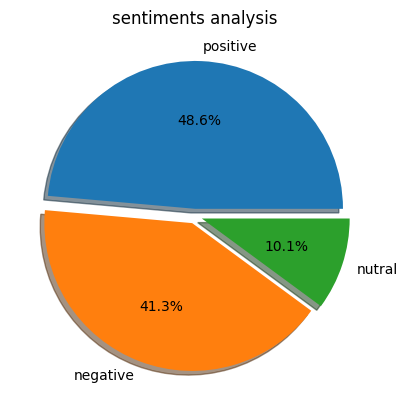

In [71]:
counts=df["sentiments"].value_counts()
label=["positive","negative","nutral"]
explode=[0.05,0.05,0.05]
plt.pie(counts,autopct="%0.1f%%",labels=label,explode=explode,shadow=True)
plt.title("sentiments analysis")
plt.savefig("sentiments_analysis_pie_chart.png")

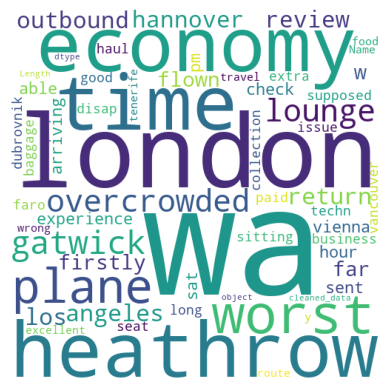

In [69]:
wc=WordCloud(width=500,height=500,background_color="white").generate(str(df.cleaned_data))
plt.imshow(wc)
plt.axis("off")
plt.savefig("wordcloud.png")